# **Projeto Final - Estatística**

## **Integrantes**

- Carlos Eduardo
- Guilherme Araújo Mendes de Souza
- Guilherme de Almeida
- Laura Busin Campos
- Luiz Henrique

## **Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats, t, spearmanr, norm, shapiro, probplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Leitura do dataset

In [ ]:
df_bodyfat = pd.read_csv ('../Data/bodyfat.csv')

#### Verificação do estado do dataset

In [ ]:
df_bodyfat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
df_bodyfat.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Questão 1

### Utilizando seus conhecimentos em Estatística Descritiva, forneça algumas análises sobre as colunas que julgar mais relevantes do dataset.

### A) Para as colunas que você escolher, mostre-me as métricas de posição e de dispersão que julgar interessantes.

In [ ]:
media = []
mediana = []
amplitude = []
variancia = []
desvpad = []

for coluna in df_bodyfat.columns:
  media.append(df_bodyfat[coluna].mean())
  mediana.append(df_bodyfat[coluna].median())
  amplitude.append(df_bodyfat[coluna].max() - df_bodyfat[coluna].min())
  variancia.append(df_bodyfat[coluna].var())
  desvpad.append(df_bodyfat[coluna].std())

medidas = {
          'Colunas' : df_bodyfat.columns,
          'Médias' : media,
          'Medianas' : mediana,
          'Amplitudes' : amplitude,
          'Variâncias' : variancia,
          'Desvios-padrão' : desvpad
          }

df_medidas = pd.DataFrame(medidas)

df_medidas

,Colunas,Médias,Medianas,Amplitudes,Variâncias,Desvios-padrão
0,Density,1.055574,1.0549,0.1139,0.000362,0.019031
1,BodyFat,19.150794,19.2000,47.5000,70.035816,8.368740
2,Age,44.884921,43.0000,59.0000,158.811405,12.602040
3,Weight,178.924405,176.5000,244.6500,863.722719,29.389160
4,Height,70.148810,70.0000,48.2500,13.416513,3.662856
5,Neck,37.992063,38.0000,20.1000,5.909339,2.430913
6,Chest,100.824206,99.6500,56.9000,71.072918,8.430476
7,Abdomen,92.555952,90.9500,78.7000,116.274745,10.783077
8,Hip,99.904762,99.3000,62.7000,51.323722,7.164058
9,Thigh,59.405952,59.0000,40.1000,27.561996,5.249952


### B) Faça um pré-julgamento a respeito das colunas deste dataset tentando encontrar um par de colunas que, pela lógica, deve ser altamente correlacionado e outro par de colunas que, pela lógica, deve ser fracamente correlacionado. Depois utilize as métricas de correlação que você aprendeu para pôr à prova essas suas opiniões, isto é, para descobrir se matemática confirma suas crenças iniciais ou não.

I. Dados altamentes correlacionados

Duas colunas que devem ser altamente correlacionadas são a de Densidade e a de Porcentagem de gordura corpórea. <br>
De acordo com a tabela de densidade por tipo de tecido disponível
na IT'IS Foundation (https://itis.swiss/virtual-population/tissue-properties/database/density/), a gordura é um dos tecidos menos densos presentes na constituição do corpo humano (média de 911 kg/m³). <br>
Assim, supondo que a densidade do corpo seja calculada considerando as proporções de seus diferentes componentes, conforme a massa de gordura aumenta em relação à massa total, menor será a densidade desse corpo.

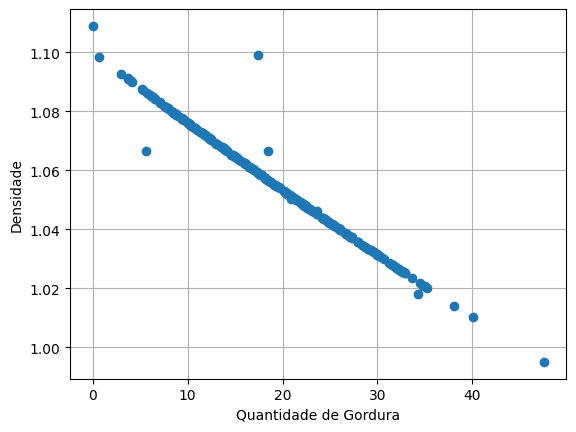

In [ ]:
plt.plot(df_bodyfat['BodyFat'], df_bodyfat['Density'], marker='o', linestyle='')

plt.xlabel('Quantidade de Gordura')

plt.ylabel('Densidade')

plt.title('')

plt.grid(True)

plt.show()

In [ ]:
'''
Calculando o índice de correlação e Pearson e de Spearman para Densidade e
Quantidade de Gordura, visto que a relação apresentada pelo gráfico é linear.
'''

r = df_bodyfat['BodyFat'].corr(df_bodyfat['Density'])
print(r)

correlacao, p = spearmanr(df_bodyfat['BodyFat'], df_bodyfat['Density'])

print(f'Correlação de Spearman: {correlacao}')
print(f'P: {p}')

-0.987782402163988
Correlação de Spearman: -0.9934043231872761
P: 3.6494895612687197e-237


II. Dados fracamente correlacionados

Duas colunas que devem ser altamente correlacionadas são a de Peso e a de Idade. <br>
O acúmulo de massa não é necessariamente proporcional ao acúmulo de tempo de vida. Ignorando fatores que afetem drasticamente o peso de uma pessoa, é comum que o peso corpóreo de um indivíduo atinja um platô em sua vida adulta. <br>
Assim, espera-se que a idade não seja um fator relevante para a determinação do peso das pessoas registradas nesse conjunto de dados.

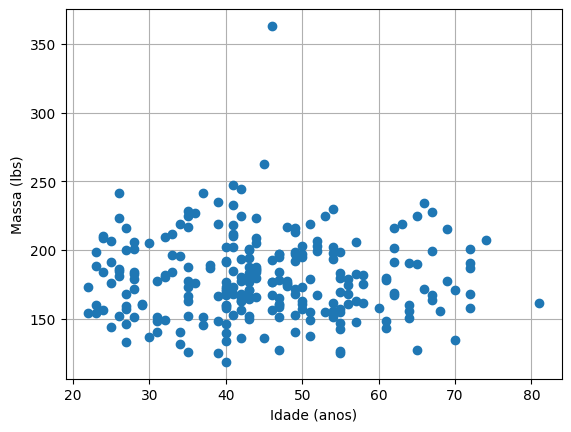

In [ ]:
plt.plot(df_bodyfat['Age'], df_bodyfat['Weight'], marker='o', linestyle='')

plt.xlabel('Idade (anos)')

plt.ylabel('Massa (lbs)')

plt.title('')

plt.grid(True)

plt.show()

In [ ]:
'''
Calculando o índice de correlação e Pearson e de Spearman para Idade e Peso,
visto que não é possível extrair algum comportamento linear ou não-linear
dos dados.
'''

r = df_bodyfat['Age'].corr(df_bodyfat['Weight'])
print(r)

correlacao, p = spearmanr(df_bodyfat['Age'], df_bodyfat['Weight'])

print(f'Correlação de Spearman: {correlacao}')
print(f'P: {p}')

-0.012746094264503589
Correlação de Spearman: -0.01300141438748095
P: 0.8372802241121118


### C) Escolha pelo menos uma coluna e verifique graficacemente se ela segue uma distribuição normal. Quais testes você poderia aplicar para confirmar se ela é mesmo normal ou não?

I. Distribuição das idades, das alturas e dos pesos: visualizando as curvas ajustadas aos histogramas.

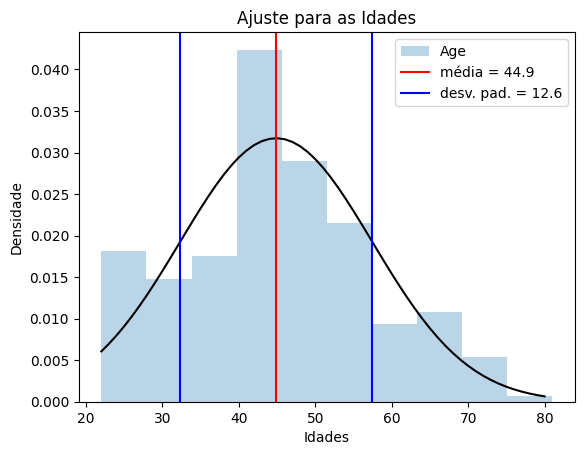

In [ ]:
'''
Verificando o ajuste da curva normal para as Idades.
'''

media = np.mean(df_bodyfat['Age'])
std = np.std(df_bodyfat['Age'])

x = np.arange(df_bodyfat['Age'].min(), df_bodyfat['Age'].max(), 1)
y = norm.pdf(x, media, std)

plt.hist(df_bodyfat['Age'], bins=10, alpha=0.3, density = True, label='Age')
plt.plot(x, y, color = 'black')
plt.title(f'Ajuste para as Idades')
plt.xlabel('Idades')
plt.ylabel('Densidade')
plt.axvline(x = media, label = f'média = {media:.1f}', color='r')
plt.axvline(x = media-std, label = f'desv. pad. = {std:.1f}', color='b')
plt.axvline(x = media+std, color='b')

plt.legend()
plt.show()

In [ ]:
'''
Aplicando o Teste de Normalidade de Shapiro-Wilk, tendo como hipótese nula a normalidade da distribuição
e hipótese alternativa a não normalidade da distribuição. Estabelecemos significância de 5% como padrão.
'''

idades = df_bodyfat['Age']

stat, p_valor = shapiro(idades)

alpha = 0.05

if p_valor > alpha:
    print(f'Com o valor-p igual a {p_valor}, podemos afirmar que a distribuição das idades é normal')
else:
    print(f'Com o valor-p igual a {p_valor}, não podemos afirmar que distribuição das idades não é normal')

Com o valor-p igual a 0.001043476746417582, não podemos afirmar que distribuição das idades não é normal


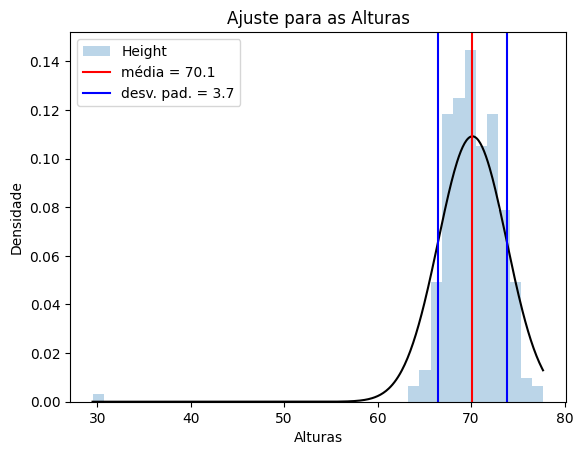

In [ ]:
'''
Verificando o ajuste da curva normal as Alturas.
'''

media = np.mean(df_bodyfat['Height'])
std = np.std(df_bodyfat['Height'])

x = np.arange(df_bodyfat['Height'].min(), df_bodyfat['Height'].max(), 0.1)
y = norm.pdf(x, media, std)

plt.hist(df_bodyfat['Height'], bins=40, alpha=0.3, density = True, label='Height')
plt.plot(x, y, color = 'black')
plt.title(f'Ajuste para as Alturas')
plt.xlabel('Alturas')
plt.ylabel('Densidade')
plt.axvline(x = media, label = f'média = {media:.1f}', color='r')
plt.axvline(x = media-std, label = f'desv. pad. = {std:.1f}', color='b')
plt.axvline(x = media+std, color='b')

plt.legend()
plt.show()

In [ ]:
'''
Aplicando o Teste de Normalidade de Shapiro-Wilk, tendo como hipótese nula a normalidade da distribuição
e hipótese alternativa a não normalidade da distribuição. Estabelecemos significância de 5% como padrão.
'''

alturas = df_bodyfat['Height']

stat, p_valor = shapiro(alturas)

alpha = 0.05

if p_valor > alpha:
    print(f'Com o valor-p igual a {p_valor}, podemos afirmar que a distribuição das alturas é normal')
else:
    print(f'Com o valor-p igual a {p_valor}, não podemos afirmar que distribuição das alturas não é normal')

Com o valor-p igual a 3.2254252009693074e-21, não podemos afirmar que distribuição das alturas não é normal


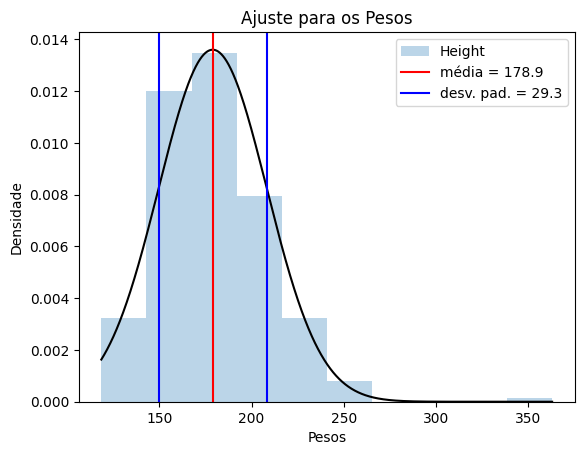

In [ ]:
'''
Verificando o ajuste da curva normal os Pesos.
'''

media = np.mean(df_bodyfat['Weight'])
std = np.std(df_bodyfat['Weight'])

x = np.arange(df_bodyfat['Weight'].min(), df_bodyfat['Weight'].max(), 0.1)
y = norm.pdf(x, media, std)

plt.hist(df_bodyfat['Weight'], bins=10, alpha=0.3, density = True, label='Height')
plt.plot(x, y, color = 'black')
plt.title(f'Ajuste para os Pesos')
plt.xlabel('Pesos')
plt.ylabel('Densidade')
plt.axvline(x = media, label = f'média = {media:.1f}', color='r')
plt.axvline(x = media-std, label = f'desv. pad. = {std:.1f}', color='b')
plt.axvline(x = media+std, color='b')

plt.legend()
plt.show()

In [ ]:
'''
Aplicando o Teste de Normalidade de Shapiro-Wilk, tendo como hipótese nula a normalidade da distribuição
e hipótese alternativa a não normalidade da distribuição. Estabelecemos significância de 5% como padrão.
'''

pesos = df_bodyfat['Weight']

stat, p_valor = shapiro(pesos)

alpha = 0.05

if p_valor > alpha:
    print(f'Com o valor-p igual a {p_valor}, podemos afirmar que a distribuição dos pesos é normal')
else:
    print(f'Com o valor-p igual a {p_valor}, não podemos afirmar que distribuição dos pesos não é normal')

Com o valor-p igual a 1.7095519666554537e-08, não podemos afirmar que distribuição dos pesos não é normal


## Questão 2

### Considerando o mesmo dataset e tomando-o como espaço amostral

### A) Qual é a probabilidade de uma pessoa selecionada ao acaso ter uma idade (coluna Age) superior a 40 anos?


Resposta A: A probabilidade de uma pessoa selecionada a acaso ter uma idade superior a 40 anos é de 63.49%




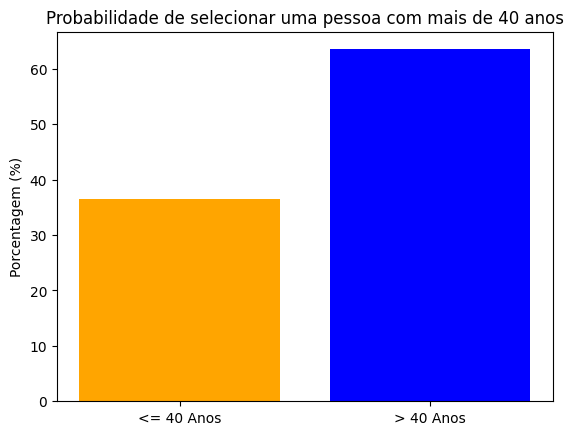

In [ ]:
prob_menor_40 = len(df_bodyfat[df_bodyfat['Age'] <= 40]) / len(df_bodyfat)
prob_maior_40 = len(df_bodyfat[df_bodyfat['Age'] > 40]) / len(df_bodyfat)

categorias = ['<= 40 Anos', '> 40 Anos']
valores = [prob_menor_40*100, prob_maior_40*100]

print(f'\nResposta A: A probabilidade de uma pessoa selecionada a acaso ter uma idade superior a 40 anos é de {round(prob_maior_40*100, 2)}%\n\n')

plt.bar(categorias, valores, color=['orange', 'blue'])
plt.xlabel('')
plt.ylabel('Porcentagem (%)')
plt.title('Probabilidade de selecionar uma pessoa com mais de 40 anos')
plt.grid(False)

plt.show()

### B) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20%?


Resposta B: A probabilidade de uma pessoa selecionada a acaso ter uma idade superior a 40 anos é de 47.62%




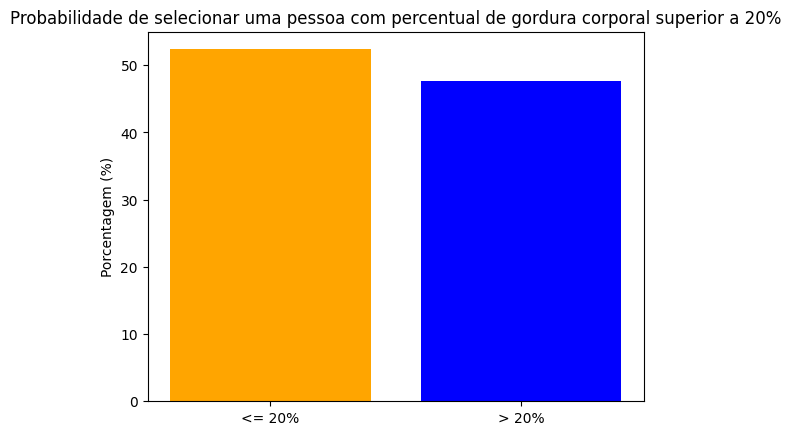

In [ ]:
prob_menor_20 = len(df_bodyfat[df_bodyfat['BodyFat'] <= 20]) / len(df_bodyfat)
prob_maior_20 = len(df_bodyfat[df_bodyfat['BodyFat'] > 20]) / len(df_bodyfat)

categorias = ['<= 20%', '> 20%']
valores = [prob_menor_20*100, prob_maior_20*100]

print(f'\nResposta B: A probabilidade de uma pessoa selecionada a acaso ter uma idade superior a 40 anos é de {round(prob_maior_20*100, 2)}%\n\n')

plt.bar(categorias, valores, color=['orange', 'blue'])
plt.xlabel('')
plt.ylabel('Porcentagem (%)')
plt.title('Probabilidade de selecionar uma pessoa com percentual de gordura corporal superior a 20%')
plt.grid(False)

plt.show()

### C) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20% e ao mesmo tempo ter uma idade (coluna Age) superior a 40 anos?


Resposta C: A probabilidade de uma pessoa selecionada a acaso ter uma idade superior a 40 anos é de 34.92%




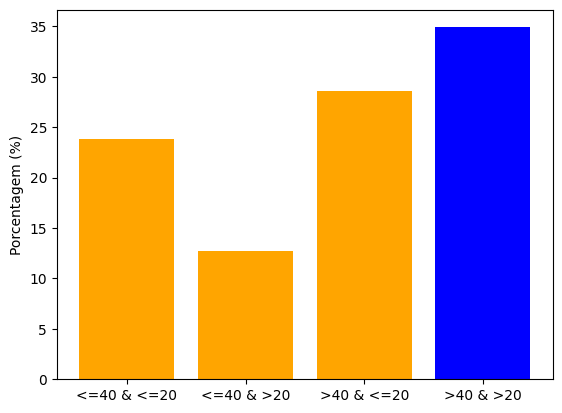

In [ ]:
i_menor_40_g_menor_20 = len(df_bodyfat[(df_bodyfat['Age'] <= 40) & (df_bodyfat['BodyFat'] <= 20)]) / len(df_bodyfat)
i_menor_40_g_maior_20 = len(df_bodyfat[(df_bodyfat['Age'] <= 40) & (df_bodyfat['BodyFat'] > 20)]) / len(df_bodyfat)
i_maior_40_g_menor_20 = len(df_bodyfat[(df_bodyfat['Age'] > 40) & (df_bodyfat['BodyFat'] <= 20)]) / len(df_bodyfat)
i_maior_40_g_maior_20 = len(df_bodyfat[(df_bodyfat['Age'] > 40) & (df_bodyfat['BodyFat'] > 20)]) / len(df_bodyfat)

categorias = ['<=40 & <=20','<=40 & >20', '>40 & <=20', '>40 & >20']
valores = [i_menor_40_g_menor_20*100, i_menor_40_g_maior_20*100, i_maior_40_g_menor_20*100, i_maior_40_g_maior_20*100]

print(f'\nResposta C: A probabilidade de uma pessoa selecionada a acaso ter uma idade superior a 40 anos é de {round(i_maior_40_g_maior_20*100, 2)}%\n\n')

plt.bar(categorias, valores, color=['orange', 'orange', 'orange', 'blue'])
plt.xlabel('')
plt.ylabel('Porcentagem (%)')
plt.title('')
plt.grid(False)

plt.show()

### D) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20% se eu já souber de antemão que esta pessoa tem uma idade superior a 40 anos?

In [ ]:
amostra = len(df_bodyfat[df_bodyfat['Age'] > 40])

menor_20_mais_40 = len(df_bodyfat[(df_bodyfat['BodyFat'] <= 20) & (df_bodyfat['Age'] > 40)])

maior_20_mais_40 = len(df_bodyfat[(df_bodyfat['BodyFat'] > 20) & (df_bodyfat['Age'] > 40)])

prob_menor_20 = menor_20_mais_40 / amostra
prob_maior_20 = maior_20_mais_40 / amostra


Resposta D: A probabilidade de uma pessoa selecionada a acaso ter uma idade superior a 40 anos é de 55.0%




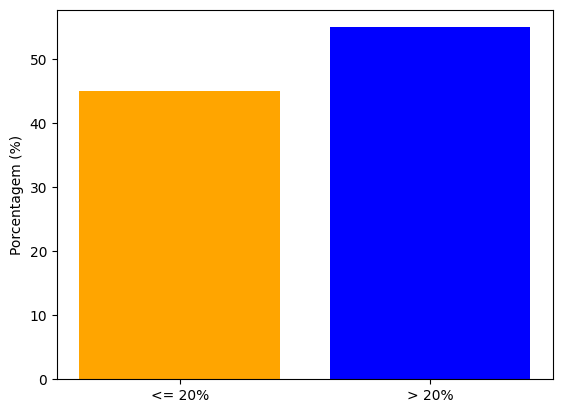

In [ ]:
categorias = ['<= 20%', '> 20%']
valores = [prob_menor_20*100, prob_maior_20*100]

print(f'\nResposta D: A probabilidade de uma pessoa selecionada a acaso ter uma idade superior a 40 anos é de {round(prob_maior_20*100, 2)}%\n\n')

plt.bar(categorias, valores, color=['orange', 'blue'])
plt.xlabel('')
plt.ylabel('Porcentagem (%)')
plt.title('')
plt.grid(False)

plt.show()

## Questão 3

### Durante o módulo, nós definimos algumas distribuições de probabilidade, cada uma com uma função de probabilidade.

### A) Escolha uma delas que não seja uma distribuição normal, e explique (talvez com algum exemplo) que tipos de evento esta distribuição descreve.

A distribuição exponencial é uma distribuição de probabilidade contínua, frequentemente usada para modelar eventos aleatórios que ocorrem a uma taxa constante, como a duração de uma chamada telefônica, o tempo entre falhas em um sistema mecânico ou o tempo de vida de um componente eletrônico.
De acordo com Kapur e Pecht (2014), essa distribuição é definida por sua Função Densidade de Probabilidade, ou Probability Density Function (PDF), conforme a Equação 1.
<center>
f(t)= λ_0 e^(-λ_0 t),t ≥ 0, (1)
</center>

“onde λ0 é um número real positivo, frequentemente chamado de taxa de falha constante. O parâmetro λ0 é normalmente uma incógnita que deve ser calculada ou estimada com base em métodos estatísticos”  (Kapur; Pecht, 2014, p.61). A Figura 1 apresenta um exemplo de gráfico para uma distribuição exponencial, com λ0 = 0,10 (Kapur; Pecht, 2014, p.61).

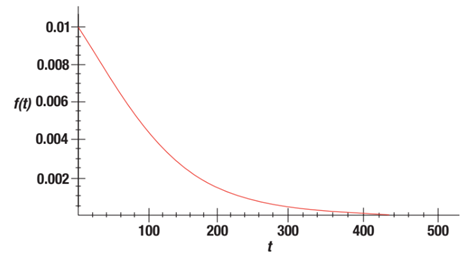

Figura 1: um exemplo de distribuição exponencial.

Por exemplo, suponha que uma empresa aeronáutica está interessada em modelar a taxa de falha de um componente crítico em um avião. A empresa descobriu que a taxa de falha é de λ = 0,005 falha por hora de operação. A distribuição exponencial pode ser usada para modelar o tempo de operação até a falha do componente. Assim, o cálculo da probabilidade de falha deste componente, em 10 horas de operação, pode ser realizado utilizando a Equação 2.
<center>
F(t) = 1-e^((-λt))      (2)
</center>

Assim, tem-se que F(10) = 1-e^((-0.005x10))  ⇒ F(10) ≈ 0,0488 . Ou seja, a probabilidade de falha do componente, em 10 horas de operação, é de aproximadamente 4,88%.

O tempo médio até falhar pode ser calculado usando a média da distribuição exponencial, conforme a Equação 3.
<center>
E(X) = 1/λ   (3)
</center>

Assim, tem-se que E(X) = 1/0.005 ⇒ E(X) =200. Ou seja, o tempo médio até a falha do componente é de 200 horas.

A distribuição exponencial tem a propriedade de “memória sem memória”, o que significa que a probabilidade de falha em um determinado intervalo de tempo não depende do histórico de falhas anteriores. Por exemplo, qual seria a probabilidade de falha deste mesmo componente, em 50 horas, dado que ainda não falhou em 20 horas?

A probabilidade de falha em 50 horas, dado que o componente ainda não falhou em 20 horas, pode ser calculada usando a propriedade de memória sem memória da distribuição exponencial:
<center>
P(X > 50 | X > 20) = P(X > 30)

P(X > 30) = 1 - F(30)

P(X > 30) = 1 - (1 - e^((-0.005x30)))

P(X > 30) = e^((-0.005x30))

P(X > 30) ≈ 0,9512
</center>

A probabilidade de falha em 50 horas, dado que o componente ainda não falhou em 20 horas, é de aproximadamente 1-P(X > 30), ou seja, os mesmos 4,88%.

### B) Explique a utilidade prática das funções de probabilidade. Quero dizer: para quê elas servem? De que modo elas nos ajudam?

As funções de probabilidade são utilizadas para modelar a probabilidade de ocorrência de eventos em diferentes contextos. Elas fornecem uma maneira de quantificar a probabilidade de um evento ocorrer, o que pode ser útil em uma variedade de aplicações práticas, como análise de dados, previsão de eventos e tomada de decisão (De Andrade; Stutz; Knupp, 2023; Guilherme et al., 2020; Limeira et al., 2020).

Em análise de dados, as funções de probabilidade são usadas para ajustar modelos aos dados coletados, o que pode ajudar a identificar padrões e tendências. Por exemplo, em um estudo sobre a distribuição diamétrica de árvores em uma floresta inequiânea, as funções de densidade de probabilidade foram usadas para ajustar diferentes modelos aos dados coletados, e o melhor modelo foi selecionado com base no teste de Kolmogorov-Smirnov (Guilherme et al., 2020).

Em previsão de eventos, as funções de probabilidade podem ser usadas para calcular a probabilidade de um evento ocorrer em um determinado intervalo de tempo. Por exemplo, em um estudo sobre a identificação de danos estruturais em uma viga de Euler-Bernoulli, as funções de base exponenciais foram usadas para descrever o campo de dano estrutural de forma contínua, e a resposta dinâmica do modelo foi obtida por meio de uma solução híbrida (analítica-numérica) fornecida pela Transformada Integral Generalizada (De Andrade; Stutz; Knupp, 2023).

Em tomada de decisão, as funções de probabilidade podem ser usadas para calcular a probabilidade de diferentes resultados ocorrerem, o que pode ajudar a escolher a melhor opção. Por exemplo, em um estudo sobre a formação continuada de profissionais da educação na perspectiva da inclusão escolar, as funções mediadoras da relação teoria e prática de Jürgen Habermas foram usadas para analisar a possibilidade de formação continuada de profissionais da educação, na perspectiva da inclusão escolar dos alunos público-alvo da educação especial (Almeida et al., 2024).

Em resumo, as funções de probabilidade são uma ferramenta poderosa para modelar a probabilidade de ocorrência de eventos em diferentes contextos. Elas podem ajudar a identificar padrões e tendências em dados, prever a ocorrência de eventos e ajudar na tomada de decisões.


**Referências**
- ALMEIDA, Mariangela Lima de, et al. Formação continuada na perspectiva inclusiva pela via da pesquisa e extensão: as funções mediadoras da relação teoria e prática na constituição de grupos de estudo-reflexão. **Revista Brasileira de Estudos Pedagógicos**, 2024, 104: e5699.

- DE ANDRADE, Renan Pinto; STUTZ, Leonardo Tavares; KNUPP, Diego Campos. Identificação de danos estruturais empregando modelos de funções exponenciais, transformação integral e inferência Bayesiana. **Scientia Plena**, 2023, 19.11.

- GUILHERME, Stephany da Silva, et al. Aderência de funções de distribuição diamétrica em diferentes amplitudes de classes de um fragmento de floresta inequiânea. **Biofix Scientific Journal**, 2020, 5.2: 239-245.

- KAPUR, Kailash Chander; PECHT, Michael. **Reliability engineering**. John Wiley & Sons, 2014.

- LIMEIRA, Mathaus Messias Coimbra, et al. Ajuste da distribuição diamétrica e similaridade florística para áreas ciliares através do uso de funções de densidade de probabilidade. **In: Colloquium Agrariae**. ISSN: 1809-8215. 2020. p. 1-16.


### c) Escolha uma das colunas do nosso dataset que sejam contínuas e que sigam uma distribuição normal, e calcule a probabilidade de uma pessoa escolhida ao acaso ter um valor > x para esta coluna (por exemplo, probabilidade de neck ser maior que 45). Mas, atenção: faça isso usando z-scores, através da função _st.norm.cdf_, do pacote Python scipy.stats.

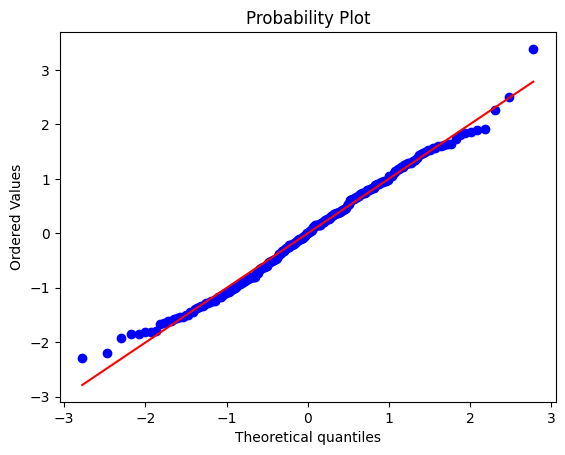

In [ ]:
# Indentificando que esta variável segue a distribuição normal

# Calculando a média de desvio padrão
media_bodyfat = df_bodyfat['BodyFat'].mean()
std_bodyfat = df_bodyfat['BodyFat'].std()

# Calculando o Z-Score de 'BodyFat'
df_bodyfat['BodyFat z Score'] = (df_bodyfat['BodyFat']- media_bodyfat) / std_bodyfat

# Plotando um gráfico de probabilidade Q-Q plot (quantile-quantile plot) para verificar se a distribuição dos z-scores segue uma distribuição normal.
probplot(df_bodyfat['BodyFat z Score'], dist='norm', plot=plt)
plt.show()

In [ ]:
# Realizando o teste de Shapiro-Wilk para a coluna 'BodyFat'
shapiro_test = shapiro(df_bodyfat['BodyFat'])

print(f"Valor de W (estatística de teste): {shapiro_test[0]:.4f}")
print(f"Valor-p: {shapiro_test[1]:.4f}")

# Interpretando o resultado
if shapiro_test[1] > 0.05:
    print("Com um valor-p > 0.05, não rejeitamos a hipótese nula de normalidade.")
else:
    print("Com um valor-p <= 0.05, rejeitamos a hipótese nula de normalidade.")

Valor de W (estatística de teste): 0.9917
Valor-p: 0.1649
Com um valor-p > 0.05, não rejeitamos a hipótese nula de normalidade.


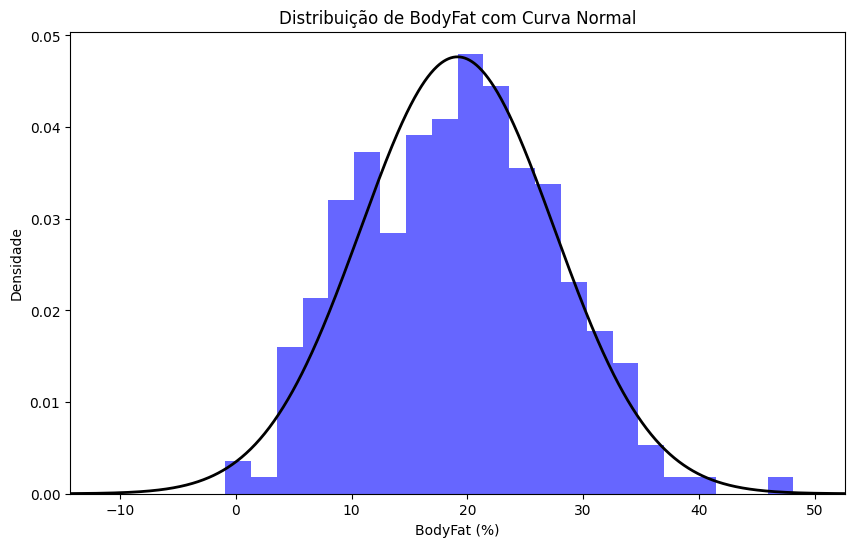

In [ ]:
# Define os limites para o eixo x baseado na média e desvio padrão
x_min = media_bodyfat - 4 * std_bodyfat
x_max = media_bodyfat + 4 * std_bodyfat

# Cria pontos x uniformemente espaçados dentro do intervalo estendido
x = np.linspace(x_min, x_max, 1000)

# Cria a curva de densidade normal para esses pontos x
y = norm.pdf(x, media_bodyfat, std_bodyfat)

# Configura o tamanho da figura
plt.figure(figsize=(10, 6))

# Plota o histograma de 'BodyFat'
plt.hist(df_bodyfat['BodyFat'], bins=30, density=True, alpha=0.6, color='blue', range=(x_min, x_max))

# Plota a curva de densidade normal
plt.plot(x, y, 'k', linewidth=2)

# Define os limites para o eixo x do gráfico
plt.xlim(x_min, x_max)

# Adiciona títulos e rótulos
plt.title('Distribuição de BodyFat com Curva Normal')
plt.xlabel('BodyFat (%)')
plt.ylabel('Densidade')

# Mostra o gráfico
plt.show()

In [ ]:
# Definindo um valor para x (a probabilidade de gordura corporal maior que 28)
x = 28

# Calculando o z-score para x
z_score_x = (x - media_bodyfat) / std_bodyfat

# Calculando a probabilidade de BodyFat ser maior que x
prob_greater_than_x = (1 - norm.cdf(z_score_x)) * 100

print(f"A probabilidade de uma pessoa escolhida ao acaso ter 'BodyFat' maior que {x} é {prob_greater_than_x:.2f}%")

A probabilidade de uma pessoa escolhida ao acaso ter 'BodyFat' maior que 28 é 14.52%


## Questão 4

### A) Escolha uma coluna de valores contínuos A que seja do seu interesse. Depois disso, filtre os registros da sua tabela usando uma segunda coluna B. E, por fim, valendo-se dos seus conhecimentos sobre p-valor, diga se a média de A antes da filtragem é de fato significativamente diferente da média dos valores de A pós filtragem, com um nível de confiança de 95%.

Escolhemos a coluna de gordura corporal (BodyFat) como sendo a coluna A e a coluna de densidade (Density) como a coluna B.

In [ ]:
# Vendo as características da coluna de densidade.
df_bodyfat['Density'].describe()

count    252.000000
mean       1.055574
std        0.019031
min        0.995000
25%        1.041400
50%        1.054900
75%        1.070400
max        1.108900
Name: Density, dtype: float64

Sabendo que a média da densidade corporal dessa população é de 1.05, gostaríamos de saber se a média da gordura corporal das pessoas dessa população é significativamente maior do que a média da gordura corporal das pessoas que tem uma densidade corporal maior que 1.05.

**H0:** As médias são iguais antes e depois da filtragem (media_populacao = media_amostra)

**H1:** As médias são diferentes antes e depois da filtragem (media_populacao != media_amostra)

In [ ]:
# Calculando a média de gordura corporal da população
media_populacao = df_bodyfat['BodyFat'].mean()
print(f'A média da gordura corporal das pessoas dessa população é de {round(media_populacao, 2)}.')

# Calculando a média de gordura corporal da amostra da população com densidade maior que 1.05
media_amostra = df_bodyfat['BodyFat'][df_bodyfat['Density'] > 1.05].mean()
print(f'\nA média da gordura corporal das pessoas que tem densidade maior que 1.05 é de {round(media_amostra, 2)}.')

# Cracterísticas da população e da amostra
n = len(df_bodyfat) # tamanho da população
std_amostral = df_bodyfat['BodyFat'][df_bodyfat['Density'] > 1.05].std() # desvio padrão da amostra

# Definindo o nível de confiança de 95%
alpha = 0.05

# Calculando o valor do teste t e seu p_valor
t_stat = (media_amostra - media_populacao) / (std_amostral / np.sqrt(n))
p_valor = t.cdf(t_stat, df = n - 1)

A média da gordura corporal das pessoas dessa população é de 19.15.

A média da gordura corporal das pessoas que tem densidade maior que 1.05 é de 13.63.


Analisando o resultado do teste t e comparando o p-valor com o nível de confiança de 95%, chegamos a conclusão que:

In [ ]:
if p_valor > alpha/2:
    print(f'\nNão rejeitamos a hipótese nula (p-valor: {p_valor}), ou seja, as médias antes e depois da filtragem são iguais.')
else:
    print(f'\nRejeitamos a hipótese nula (p-valor: {p_valor}), ou seja, as médias antes e depois da filtragem são realmente diferentes.')


Rejeitamos a hipótese nula (p-valor: 7.129762756480796e-44), ou seja, as médias antes e depois da filtragem são realmente diferentes.


Análises gráficas de comparação das médias

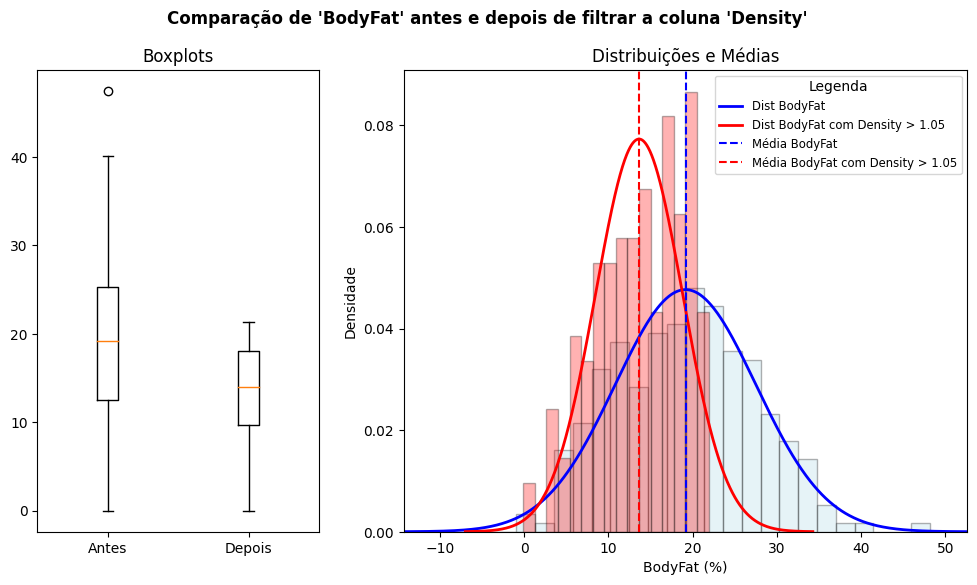

In [ ]:
plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})
plt.suptitle("Comparação de 'BodyFat' antes e depois de filtrar a coluna 'Density'", fontweight='bold')

## Gráfico 1
plt.subplot(1, 2, 1)

# Tranformando as distribuições em listas
gordura = df_bodyfat['BodyFat'].to_list()
gordura_com_densidade = df_bodyfat['BodyFat'][df_bodyfat['Density'] > 1.05].to_list()

# Plota os boxplots
plt.boxplot([gordura, gordura_com_densidade], labels=['Antes', 'Depois'])
plt.title('Boxplots')


## Gráfico 2
plt.subplot(1, 2, 2)

# Calculando o desvio padrão
std_populacao = df_bodyfat['BodyFat'].std()
std_amostra = df_bodyfat['BodyFat'][df_bodyfat['Density'] > 1.05].std()

# Define os limites para o eixo x baseado na média e desvio padrão
x_min_p = media_populacao - 4 * std_populacao
x_max_p = media_populacao + 4 * std_populacao

x_min_a = media_amostra - 4 * std_amostra
x_max_a = media_amostra + 4 * std_amostra

# Cria pontos x uniformemente espaçados dentro do intervalo estendido
x_p = np.linspace(x_min_p, x_max_p, 1000)
x_a = np.linspace(x_min_a, x_max_a, 1000)

# Cria a curva de densidade normal para esses pontos x
y_p = norm.pdf(x_p, media_populacao, std_populacao)
y_a = norm.pdf(x_a, media_amostra, std_amostra)

# Plota o histograma de 'BodyFat'
plt.hist(df_bodyfat['BodyFat'], bins=30, density=True, alpha=0.3, color='lightblue', edgecolor='black', range=(x_min_p, x_max_p))
plt.hist(df_bodyfat['BodyFat'][df_bodyfat['Density'] > 1.05], bins=30, density=True, alpha=0.3, color='red', edgecolor='black', range=(x_min_a, x_max_a))

# Plota a curva de densidade normal
plt.plot(x_p, y_p, linewidth=2, color = 'blue')
plt.plot(x_a, y_a, linewidth=2, color = 'red')

# Define os limites para o eixo x do gráfico
plt.xlim(x_min_p, x_max_p)

# Marca a média
plt.axvline(media_populacao, color = 'blue', linestyle='--')
plt.axvline(media_amostra, color = 'red', linestyle='--')

# Definindo as legendas
plt.legend(title='Legenda', labels=['Dist BodyFat', 'Dist BodyFat com Density > 1.05', 'Média BodyFat', 'Média BodyFat com Density > 1.05'], fontsize= 'small')

# Adiciona títulos e rótulos
plt.title('Distribuições e Médias')
plt.xlabel('BodyFat (%)')
plt.ylabel('Densidade')


# Mostra o gráfico
plt.show()

## Questão 5

### Pesquisas eleitorais envolvem, quase sempre, um imenso problema estatístico: a menos que você esteja interessado nas eleições municipais de uma cidade com 5 mil habitantes, você nunca terá o tempo e o orçamento necessários para entrevistar 100% dos potenciais eleitores. Imagine só, como poderíamos entrevistar mais de 100 milhões de pessoas para tentar prever com exatidão o resultado das eleições presidenciais do Brasil?
### Utilizando os seus conhecimentos sobre amostragem estatística, descreva como você faria para selecionar, por exemplo, 20 mil pessoas para serem entrevistadas, com o objetivo de produzir uma amostra que seja minimamente suficiente para predizer as intenções de voto de um grupo tão maior de pessoas quanto no caso das eleições presidenciais brasileiras. Explique, também, por que você tomou essa decisão e diga qual é o nome do tipo de amostragem estatística que você utilizou.

Para produzir uma amostragem representativa das intenções de voto da população brasileira. A melhor estratégia é utilizar a técnica de amostragem estratificada. Pois este método permite obter uma amostra que reflete as diversas características da sociedade brasileira. Como características demográficas, socioeconômicas, e geográficas, minimizando assim os vieses e melhorando a precisão das estimativas das intenções de voto.
Como realizar

Como realizar a amostragem:
- **Definição dos Estratos:** Dividir a população total em estratos (subgrupos) com base em características relevantes para o estudo eleitoral. Como a divisão por regiões geográficas, faixas etárias, gênero, classe socioeconômica, e grau de escolaridade.
- **Seleção das amostras dentro dos estratos**: Dentro de cada estrato, devemos selecionar aleatoriamente indivíduos para compor a amostra. E proporcionalmente ao peso de cada estratos.
- **Coleta de dados:** As questões e entrevistas devem ser padronizadas para garantir a confiabilidade dos dados.
- **Ponderação dos resultados:** Ao analisar os dados, os resultados devem ser ajustados com base no peso de cada estrato na população total.

A escolha deste método de amostragem se deve a sua eficácia em representar populações diversificadas e grandes. Ao estratificar a população, garantimos que todos os segmentos significativos do eleitorado sejam incluídos na amostra, E isso é vital em um país tão grande e diverso quanto o Brasil. Isso aumenta a precisão das estimativas das intenções de voto e minimiza o viés de seleção, que pode ocorrer se certos grupos forem sub-representados ou super-representados na amostra.